# **Group 15_Predicting Customer Churn in the Telecom Industry**

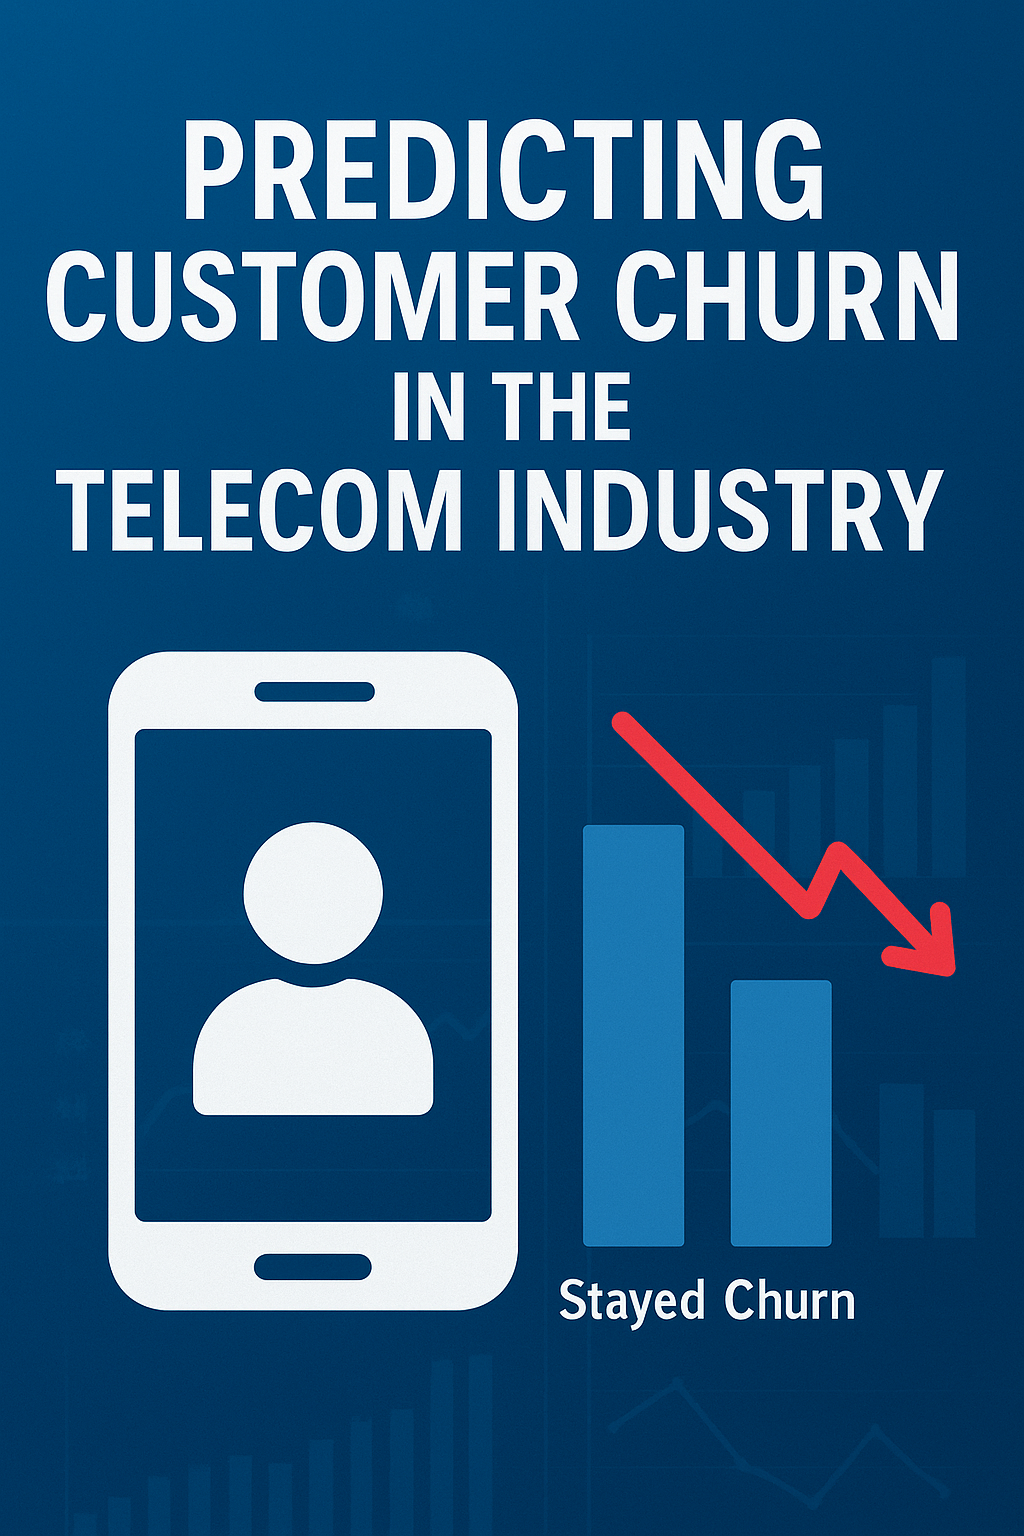

## Group Members
$$
\begin{array}{cc}
\textbf{K.W.H. Roshani} & \textbf{C. Agakar} \\
\text{EG/2020/4167} & \text{EG/2020/3805}
\end{array}
$$


## Introduction

Customer churn refers to the phenomenon where customers discontinue their relationship with a service provider. In the context of the telecommunication industry, churn typically occurs when customers cancel their subscriptions or switch to a competitor's services. This poses a significant challenge for telecom companies, as retaining existing customers is often more cost-effective than acquiring new ones.

Predicting customer churn enables telecom providers to proactively identify at-risk customers and implement targeted retention strategies. By leveraging machine learning techniques, companies can analyze patterns in customer behavior, usage, and demographics to make accurate churn predictions.

This project aims to develop a machine learning-based model to predict customer churn using the publicly available **Telco Customer Churn** dataset. The study will explore two classification models, **Decision Tree** and **Random Forest** to assess their effectiveness in identifying customers who are likely to churn. The ultimate goal is to gain actionable insights that can assist telecom companies in reducing customer attrition and enhancing service quality.


---
##Literature Survey
Customer churn, often defined as the rate at which customers discontinue their service with a company, poses a serious financial threat to telecom providers. With annual churn rates sometimes exceeding 30% in this industry, retaining customers has become more critical than ever [1]. The cost of acquiring a new customer is estimated to be five to seven times higher than retaining an existing one [2]. This financial burden has motivated researchers and telecom operators to explore machine learning (ML) as a means of predicting churn before it happens, enabling timely, targeted retention strategies.

Early efforts in churn prediction focused on classical machine learning methods such as logistic regression, decision trees, and support vector machines (SVM). Logistic regression is often used as a baseline model due to its simplicity and interpretability. However, its linear nature makes it less capable of capturing complex, non-linear relationships between customer features and churn behavior. For example, Taskin [2] found that logistic regression yielded relatively poor recall when applied to telecom churn data, failing to detect many actual churners.

Decision trees, in contrast, can model non-linear feature interactions through hierarchical splits. They are favored for their transparency and ease of interpretation, particularly in business settings. However, they can be prone to overfitting and are sensitive to small changes in the data [3]. SVMs have also been explored, given their ability to handle non-linear classification boundaries using kernel tricks. Still, they often underperform in churn scenarios due to imbalanced class distributions and high feature dimensionality [3].

To overcome the limitations of single models, researchers have increasingly adopted ensemble methods. Random Forest, which aggregates the results of multiple decision trees trained on different data subsets, has shown excellent performance in numerous studies. Chang et al. [1] reported a Random Forest model achieving 91.66% accuracy with balanced precision and recall, making it suitable for both identifying churners and reducing false positives. Similarly, Wagh et al. [4] found Random Forest to outperform other classifiers, achieving over 99% accuracy when applied to an upsampled dataset. Its robustness to overfitting and ability to handle mixed feature types make Random Forest a popular choice for real-world telecom applications.

Another leading approach is gradient boosting, specifically XGBoost and LightGBM. These models build sequential decision trees, each correcting the errors of the previous one. Taskin [2] showed that both XGBoost and LightGBM outperformed other models, achieving 95.74% accuracy, while also offering better recall for the churn class. Gradient boosting methods typically surpass bagging methods like Random Forest when tuned properly, although they can be more complex to train and interpret.

Many studies have also included comparative evaluations. Gaur and Dubey [3] compared logistic regression, SVM, Random Forest, and gradient boosting, concluding that boosting yielded the highest accuracy (AUC ~84.6%). Kavitha et al. [5] also showed that ensemble models like Random Forest and XGBoost outperformed simpler models in accuracy and reliability. Notably, ensemble methods consistently offered stronger recall for identifying actual churners, crucial for effective retention planning.

Recent research has emphasized not just predictive performance but also interpretability. Explainable AI techniques such as SHAP and LIME have been applied to ensemble models to reveal how specific features influence predictions. Chang et al. [1] demonstrated how SHAP values could identify key churn indicators like tenure, contract type, and service charges, enabling data-driven business interventions. This interpretability is particularly important in customer-facing industries like telecom, where understanding why a prediction was made is often as valuable as the prediction itself.

Another important trend is handling class imbalance. Churn datasets often contain far more non-churners than churners. Methods like SMOTE (Synthetic Minority Over-sampling Technique) and cost-sensitive learning have been used to address this imbalance. Wagh et al. [4] highlighted how oversampling significantly boosted the performance of their decision tree models, raising accuracy from ~78% to over 93% before even applying ensemble methods.

In summary, the literature demonstrates a clear shift toward ensemble and hybrid approaches for telecom churn prediction. While traditional models like logistic regression and decision trees offer interpretability, they lack the predictive power of modern ensemble methods. Random Forest and XGBoost, in particular, stand out as high-performing models capable of capturing complex churn patterns. Combined with explainability tools and proper class balancing techniques, these models enable telecom providers to not only predict churn with high accuracy but also to understand and act upon the underlying reasons.

---
## Dataset Description


The dataset used in this study is the Telco Customer Churn dataset, consisting of 7,043 customer records and 21 attributes. These attributes capture demographic details, subscription types, service usage, account information, and billing charges.


🔗 **Dataset Link:** [Click here to view the dataset on Kaggle](https://www.kaggle.com/datasets/palashfendarkar/wa-fnusec-telcocustomerchurn/data)

---

## Key Features

- `customerID` – Unique customer identifier  
- `gender` – Gender of the customer (Male/Female)  
- `SeniorCitizen` – Whether the customer is a senior citizen (1/0)  
- `Partner` – Whether the customer has a partner  
- `Dependents` – Whether the customer has dependents  
- `tenure` – Number of months the customer has stayed  
- `PhoneService` – Whether the customer has phone service  
- `MultipleLines` – If multiple phone lines are active  
- `InternetService` – DSL, Fiber optic, or None  
- `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport` – Value-added services  
- `StreamingTV`, `StreamingMovies` – Entertainment services  
- `Contract` – Type of contract (Month-to-month, One year, Two year)  
- `PaperlessBilling` – Whether billing is paperless  
- `PaymentMethod` – Payment method used  
- `MonthlyCharges` – The monthly amount charged  
- `TotalCharges` – The total amount charged  
- `Churn` – **Target**: Whether the customer churned (Yes/No)  

---

## Algorithms Used

To build the churn prediction model, we apply two primary machine learning algorithms:

- **Decision Tree Classifier**  
- **Random Forest Classifier**  

These models are chosen for their **interpretability** and **strong performance** on structured/tabular data,  
helping us identify key churn drivers and improve customer retention strategies.

---


In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data as a pandas dataframe
df = pd.read_csv("/content/drive/MyDrive/Machine Learning Project Data Set/WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [ ]:
# Show first five rows
display(df.head())

# Dataset shape (rows, columns)
print("Shape of dataset:", df.shape)

# Data types of each column
print("\nData Types:\n", df.dtypes)

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

Shape of dataset: (7043, 21)

Data Types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing values per column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies   

In [ ]:
# Class distribution of Churn
print("\nChurn distribution:\n", df['Churn'].value_counts())

# Percentage distribution
print("\nChurn percentage:\n", df['Churn'].value_counts(normalize=True) * 100)


Churn distribution:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn percentage:
 Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [ ]:
# Summary statistics of numerical features
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
        SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


/tmp/ipython-input-28608654.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="pastel")


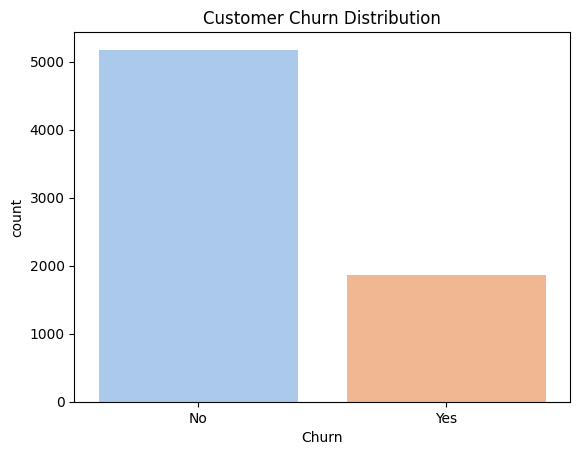

In [ ]:
# Plot of churn distribution
sns.countplot(x="Churn", data=df, palette="pastel")
plt.title("Customer Churn Distribution")
plt.show()

### Class Distribution

The dataset is imbalanced:  

- **No (did not churn):** 5,174 customers (73.5%)  
- **Yes (churned):** 1,869 customers (26.5%)  


### Numerical Feature Insights

- **tenure (months):** ranges from 0 to 72, with an average of ~32 months.  
- **MonthlyCharges:** ranges from 18.25 to 118.75, mean ~64.76.  
- **SeniorCitizen:** binary field (0 = non-senior, 1 = senior), only ~16% seniors.  

### Data Quality

- Pandas reports no missing values, but manual inspection reveals that the **TotalCharges** column is stored as an object type and contains blank entries.  
- These blanks must be converted to numeric and cleaned during data preprocessing.  
- Other categorical variables (e.g., Contract, InternetService) will require encoding before feeding into ML models.  

In [ ]:
# dropping customerID column as this is not required for modelling
df = df.drop(columns=["customerID"])

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# printing the unique values in all the columns

numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [ ]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [ ]:
# Check missing values again
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
# Show rows with missing TotalCharges
print("\nRows with missing TotalCharges:")
display(df[df['TotalCharges'].isnull()][['tenure','MonthlyCharges','TotalCharges']])


Rows with missing TotalCharges:


tenure  MonthlyCharges  TotalCharges
488        0           52.55           NaN
753        0           20.25           NaN
936        0           80.85           NaN
1082       0           25.75           NaN
1340       0           56.05           NaN
3331       0           19.85           NaN
3826       0           25.35           NaN
4380       0           20.00           NaN
5218       0           19.70           NaN
6670       0           73.35           NaN
6754       0           61.90           NaN

In [ ]:
# Impute missing values using: TotalCharges = tenure * MonthlyCharges
# For tenure = 0, this results in TotalCharges = 0
df['TotalCharges'] = df.apply(
    lambda row: row['tenure'] * row['MonthlyCharges'] if pd.isnull(row['TotalCharges']) else row['TotalCharges'],
    axis=1
)

In [ ]:
# Verify for missing values again
print("Missing values per column after imputation:\n", df.isnull().sum())

Missing values per column after imputation:
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
print("\nSample of imputed TotalCharges values:")
display(df.loc[df['tenure'] == 0, ['tenure','MonthlyCharges','TotalCharges']].head(10))


Sample of imputed TotalCharges values:


tenure  MonthlyCharges  TotalCharges
488        0           52.55           0.0
753        0           20.25           0.0
936        0           80.85           0.0
1082       0           25.75           0.0
1340       0           56.05           0.0
3331       0           19.85           0.0
3826       0           25.35           0.0
4380       0           20.00           0.0
5218       0           19.70           0.0
6670       0           73.35           0.0

# Exploratory Data Analysis

In [ ]:
import numpy as np
from scipy import stats

In [ ]:
pd.set_option("display.max_colwidth", 200) # show full column content up to 200 chars
sns.set_theme(context="notebook", style="whitegrid")  # set seaborn plot style

In [ ]:
# Make a readable categorical version of SeniorCitizen
df["SeniorCitizenCat"] = df["SeniorCitizen"].map({0: "No", 1: "Yes"}).astype("category")

In [ ]:
# Binary flag for churn
df["ChurnFlag"] = df["Churn"].map({"Yes": 1, "No": 0})

In [ ]:
# Column groups
num_cols = [c for c in ["tenure","MonthlyCharges","TotalCharges"] if c in df.columns]
cat_cols = [c for c in df.select_dtypes(include=["object","category"]).columns if c != "Churn"]
if "SeniorCitizenCat" not in cat_cols:
    cat_cols = ["SeniorCitizenCat"] + cat_cols  # ensure it's first

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

Numeric columns: ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizenCat']


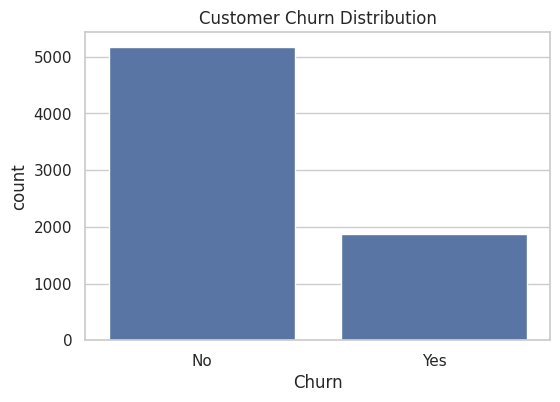

Churn
No     73.46
Yes    26.54
Name: percent (%), dtype: float64


In [ ]:
# Target distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df)
plt.title("Customer Churn Distribution")
plt.show()

print(df["Churn"].value_counts(normalize=True).mul(100).round(2).rename("percent (%)"))

The dataset is imbalanced, with 73.5% of customers retained and 26.5% churned, indicating the need for careful handling of class imbalance during modeling

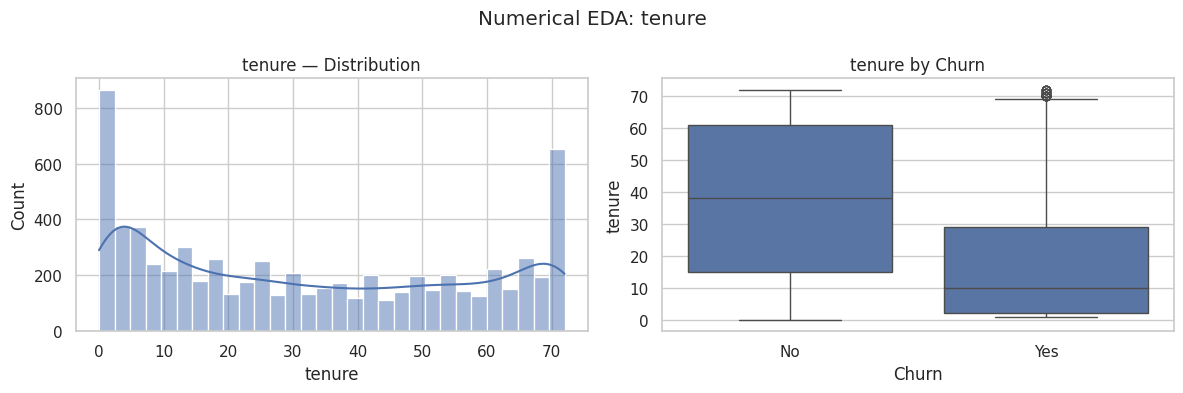

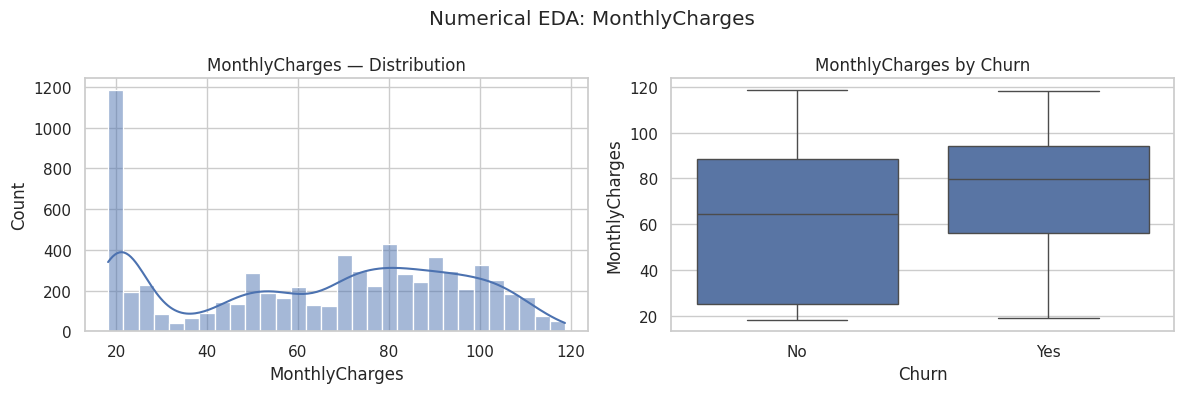

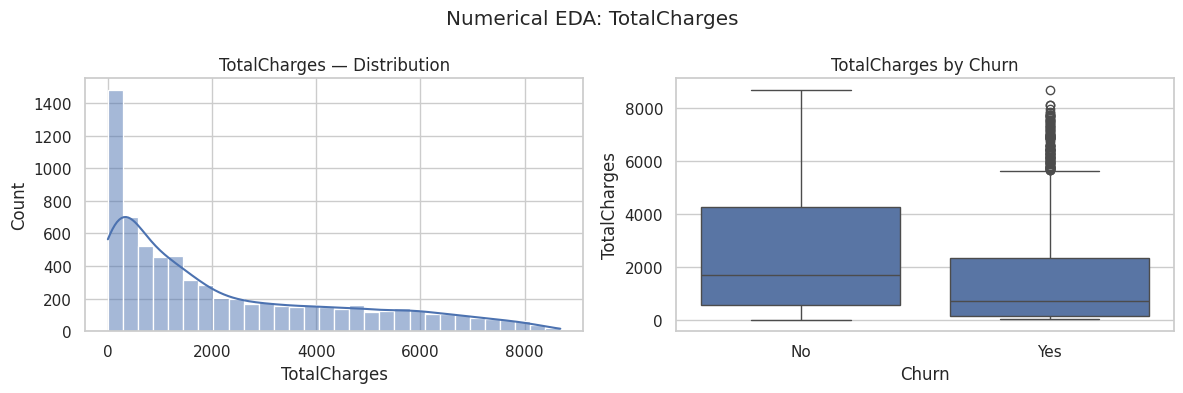

In [ ]:
#Numerical features — distributions & churn contrast
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    sns.histplot(df[col].dropna(), bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f"{col} — Distribution")

    sns.boxplot(x="Churn", y=col, data=df, ax=axes[1])
    axes[1].set_title(f"{col} by Churn")
    plt.suptitle(f"Numerical EDA: {col}")
    plt.tight_layout()
    plt.show()

Churners tend to have shorter tenures, higher monthly charges, and lower total charges compared to retained customers, highlighting tenure and billing as key churn indicators.

In [ ]:
#Point-biserial correlation (numeric ↔ churn)
pb_rows = []
for col in num_cols:
    x = df[col].astype(float)
    y = df["ChurnFlag"].astype(int)
    mask = x.notna()
    r, p = stats.pointbiserialr(y[mask], x[mask])
    pb_rows.append((col, r, p))
pb_table = pd.DataFrame(pb_rows, columns=["feature","point_biserial_r","p_value"]).sort_values("point_biserial_r", ascending=False)
display(pb_table)

feature  point_biserial_r        p_value
1  MonthlyCharges          0.193356   2.706646e-60
2    TotalCharges         -0.198324   2.127212e-63
0          tenure         -0.352229  7.999058e-205

Tenure shows the strongest negative correlation with churn (-0.35), followed by weaker but significant associations with MonthlyCharges (+0.19) and TotalCharges (-0.19), confirming tenure and billing are key churn predictors.

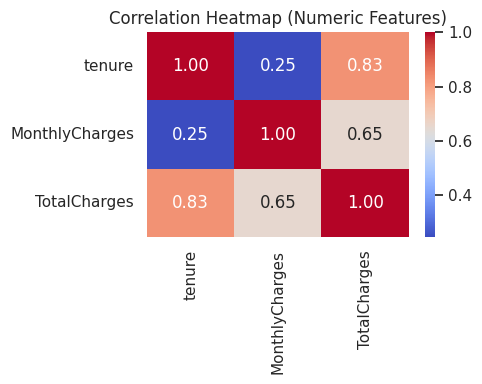

In [ ]:
#Correlation heatmap among numeric features
plt.figure(figsize=(5,4))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()

Correlation analysis shows that TotalCharges is highly correlated with tenure (r = 0.83) and moderately with MonthlyCharges (r = 0.65), suggesting redundancy as TotalCharges is essentially derived from tenure and monthly billing.

/tmp/ipython-input-3450400527.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ct = (df.groupby(col)["ChurnFlag"]


count  churn_rate
SeniorCitizenCat                   
Yes                1142       41.68
No                 5901       23.61

/tmp/ipython-input-3450400527.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = (df.groupby(col)["ChurnFlag"].mean().loc[ct.index]*100).round(2)


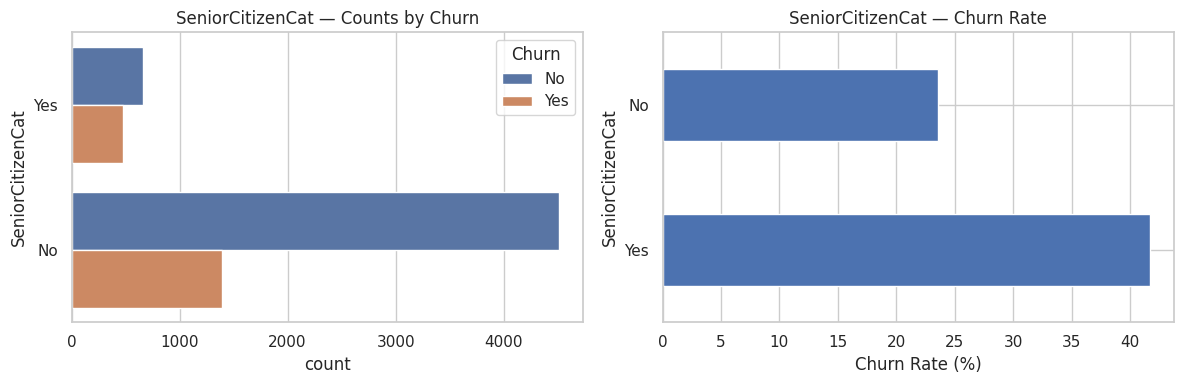

count  churn_rate
Contract                         
Month-to-month   3875       42.71
One year         1473       11.27
Two year         1695        2.83

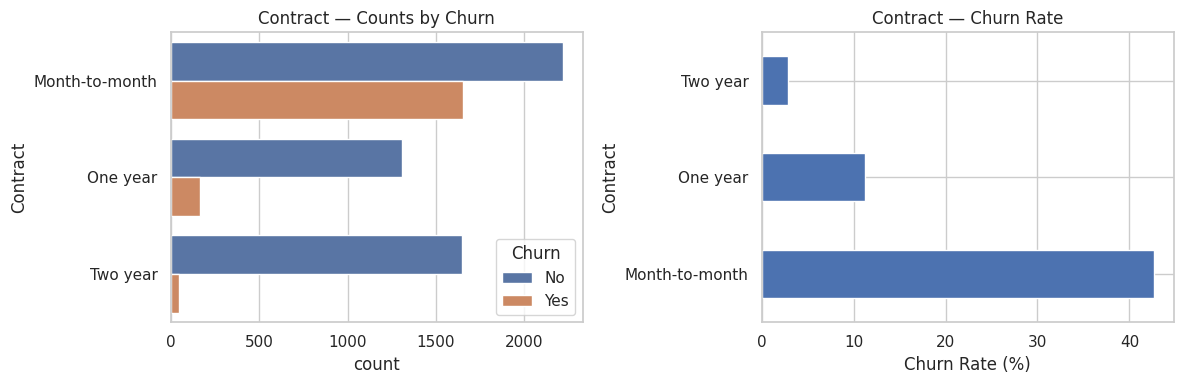

count  churn_rate
InternetService                   
Fiber optic       3096       41.89
DSL               2421       18.96
No                1526        7.40

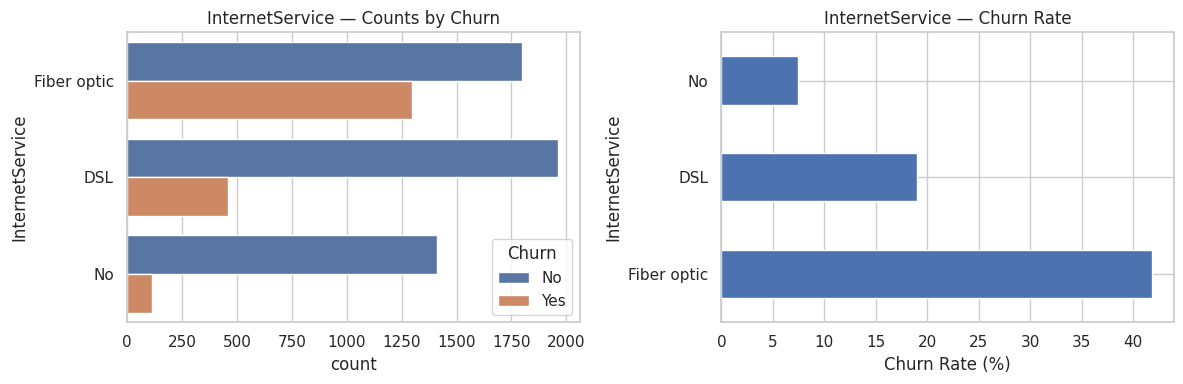

count  churn_rate
PaymentMethod                               
Electronic check            2365       45.29
Mailed check                1612       19.11
Bank transfer (automatic)   1544       16.71
Credit card (automatic)     1522       15.24

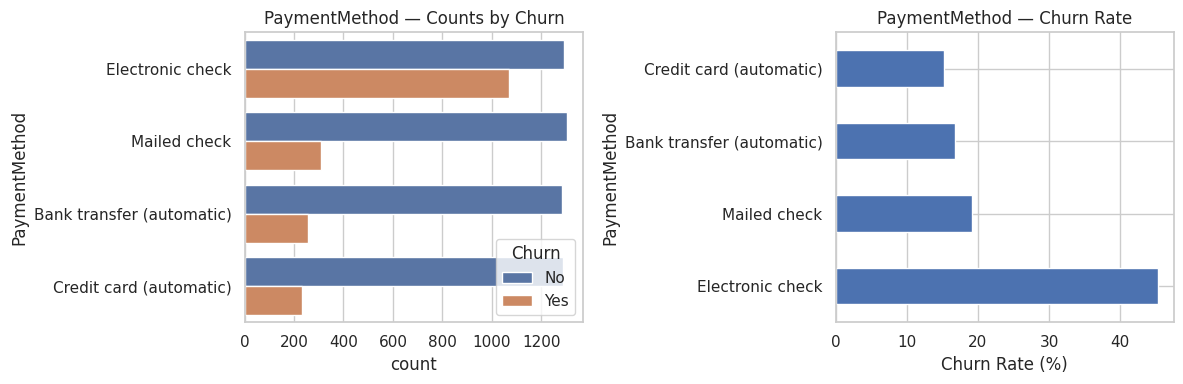

count  churn_rate
PaperlessBilling                   
Yes                4171       33.57
No                 2872       16.33

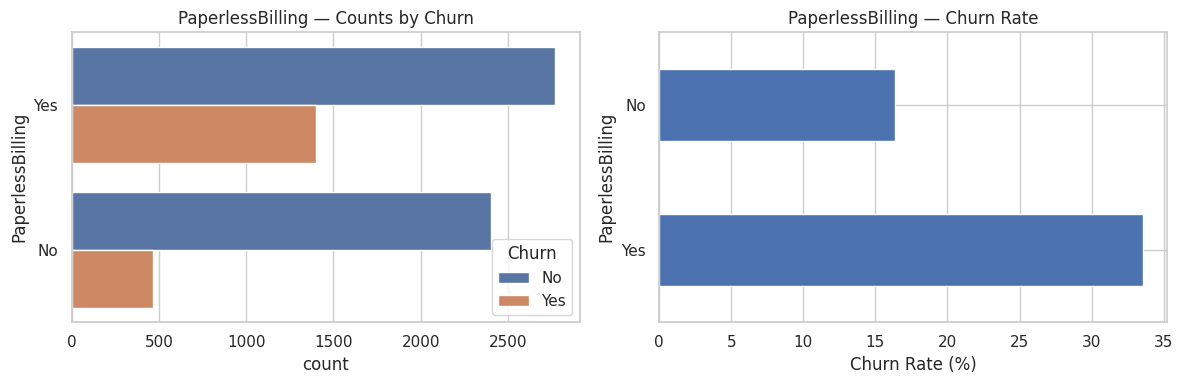

count  churn_rate
OnlineSecurity                        
No                    3498       41.77
Yes                   2019       14.61
No internet service   1526        7.40

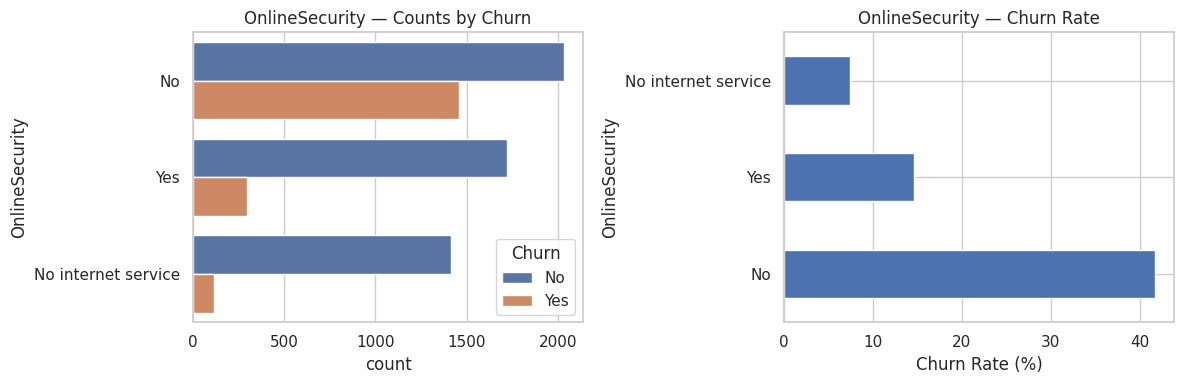

count  churn_rate
TechSupport                           
No                    3473       41.64
Yes                   2044       15.17
No internet service   1526        7.40

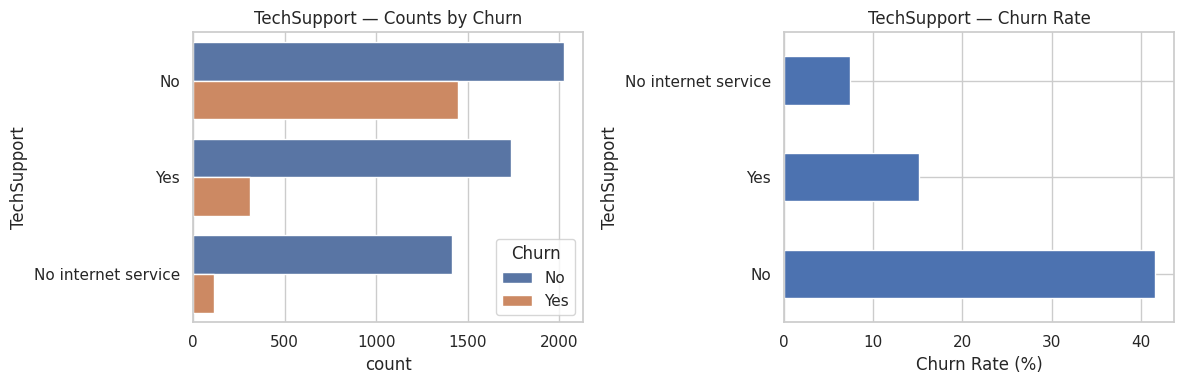

count  churn_rate
MultipleLines                      
Yes                2971       28.61
No                 3390       25.04
No phone service    682       24.93

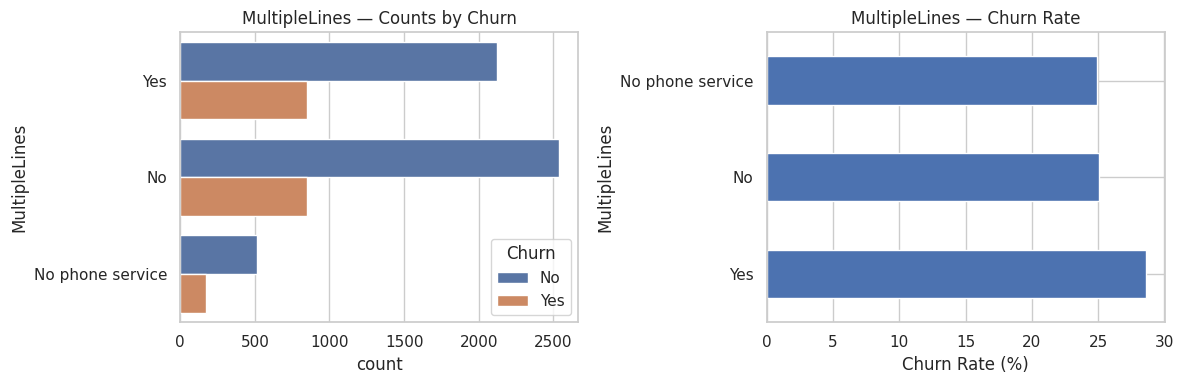

count  churn_rate
StreamingTV                           
No                    2810       33.52
Yes                   2707       30.07
No internet service   1526        7.40

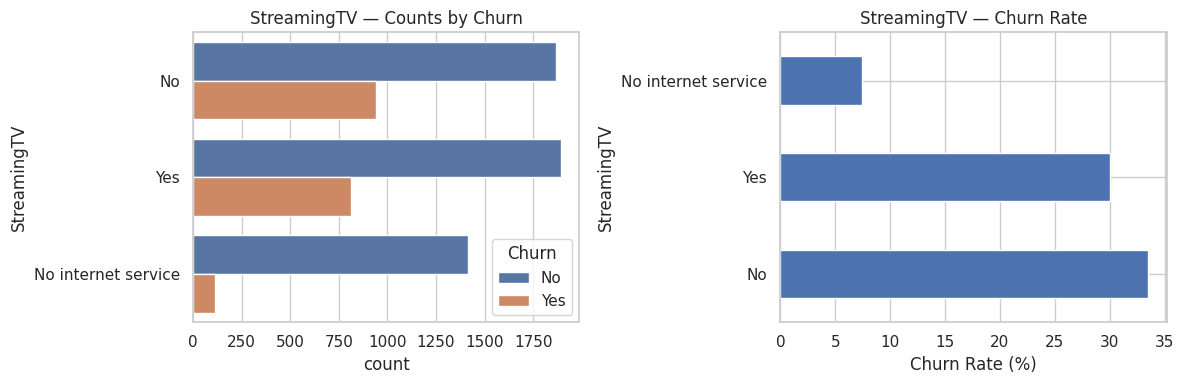

count  churn_rate
StreamingMovies                       
No                    2785       33.68
Yes                   2732       29.94
No internet service   1526        7.40

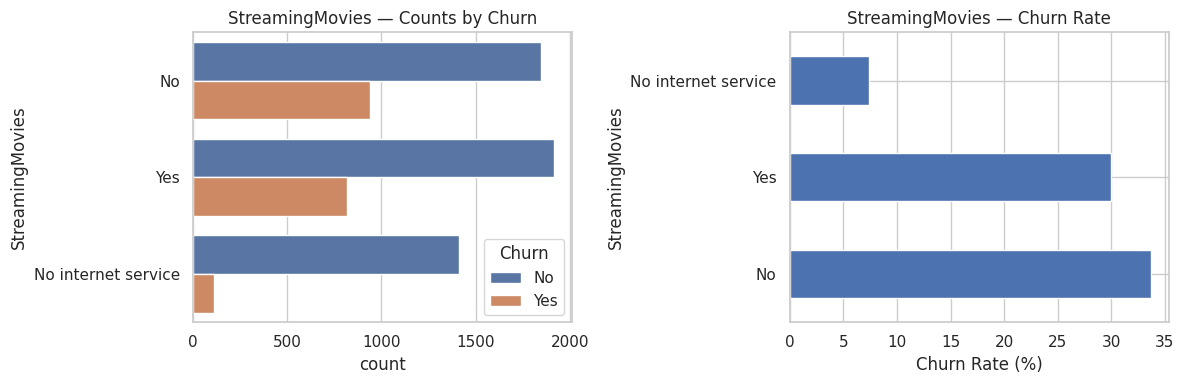

count  churn_rate
Partner                   
No        3641       32.96
Yes       3402       19.66

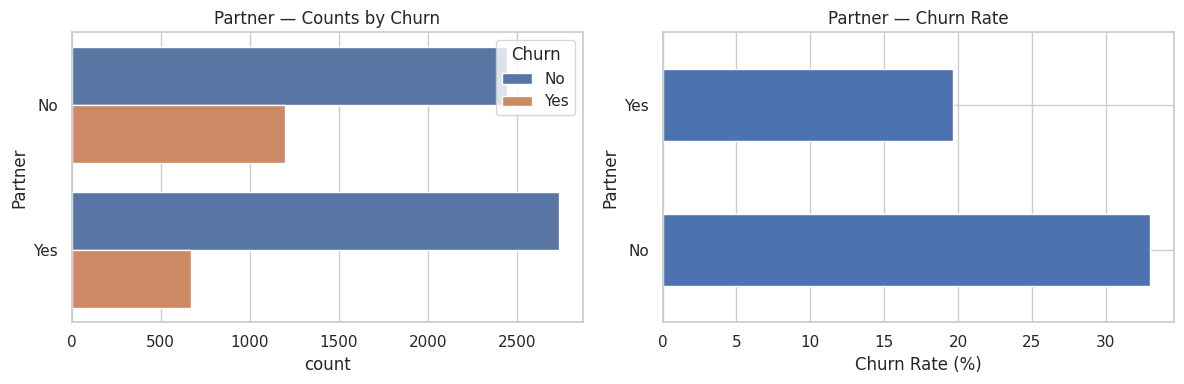

count  churn_rate
Dependents                   
No           4933       31.28
Yes          2110       15.45

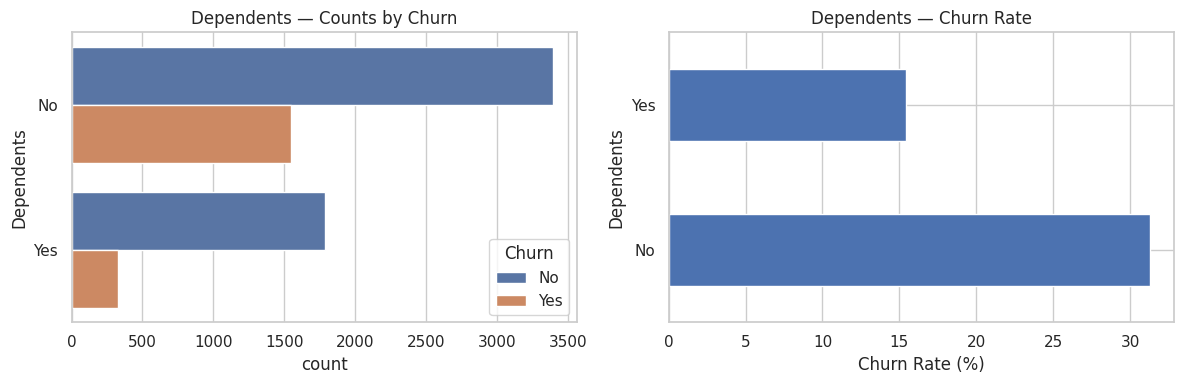

count  churn_rate
gender                   
Female   3488       26.92
Male     3555       26.16

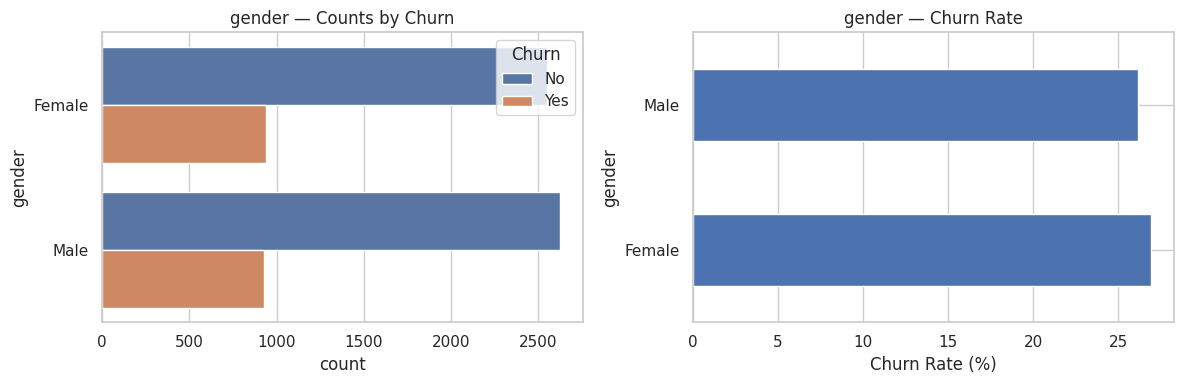

In [ ]:
#Categorical features — churn counts & churn rate
def plot_cat_churn(col, topn=None):
    ct = (df.groupby(col)["ChurnFlag"]
            .agg(count="size", churn_rate="mean")
            .sort_values("churn_rate", ascending=False))
    if topn: ct = ct.head(topn)
    display(ct.assign(churn_rate=(ct["churn_rate"]*100).round(2)))

    fig, ax = plt.subplots(1,2, figsize=(12,4))
    sns.countplot(y=col, hue="Churn", data=df, order=ct.index, ax=ax[0])
    ax[0].set_title(f"{col} — Counts by Churn")

    rate = (df.groupby(col)["ChurnFlag"].mean().loc[ct.index]*100).round(2)
    rate.plot(kind="barh", ax=ax[1])
    ax[1].set_xlabel("Churn Rate (%)")
    ax[1].set_title(f"{col} — Churn Rate")
    plt.tight_layout()
    plt.show()

priority_cats = [
    "SeniorCitizenCat","Contract","InternetService","PaymentMethod","PaperlessBilling",
    "OnlineSecurity","TechSupport","MultipleLines","StreamingTV","StreamingMovies",
    "Partner","Dependents","gender"
]
for col in [c for c in priority_cats if c in df.columns]:
    plot_cat_churn(col)



- Senior citizens tend to churn more frequently than non-seniors.  
- Customers on month-to-month contracts are more likely to churn, while longer-term contracts significantly reduce churn.  
- Fiber optic users show higher churn compared to DSL users.  
- Customers who pay through electronic checks and use paperless billing have higher churn rates.  
- Lack of OnlineSecurity or TechSupport is associated with higher churn, suggesting these services help retain customers.  
- Having a partner or dependents generally lowers the likelihood of churn.  
- Gender does not appear to have a meaningful impact on churn.

In [ ]:
#Association tests
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.to_numpy().sum()
    r, k = confusion_matrix.shape
    return np.sqrt((chi2/n) / (min(k-1, r-1)))

chi_rows = []
for col in cat_cols:
    tab = pd.crosstab(df[col], df["Churn"])
    chi2, p, dof, exp = stats.chi2_contingency(tab)
    v = cramers_v(tab)
    chi_rows.append((col, chi2, dof, p, v))

chi_table = pd.DataFrame(chi_rows, columns=["feature","chi2","dof","p_value","cramers_v"]).sort_values("cramers_v", ascending=False)
display(chi_table)


feature         chi2  dof        p_value  cramers_v
12          Contract  1184.596572    2  5.863038e-258   0.410116
6     OnlineSecurity   849.998968    2  2.661150e-185   0.347400
9        TechSupport   828.197068    2  1.443084e-180   0.342916
5    InternetService   732.309590    2  9.571788e-160   0.322455
14     PaymentMethod   648.142327    3  3.682355e-140   0.303359
7       OnlineBackup   601.812790    2  2.079759e-131   0.292316
8   DeviceProtection   558.419369    2  5.505219e-122   0.281580
11   StreamingMovies   375.661479    2   2.667757e-82   0.230951
10       StreamingTV   374.203943    2   5.528994e-82   0.230502
13  PaperlessBilling   258.277649    1   4.073355e-58   0.191498
2         Dependents   189.129249    1   4.924922e-43   0.163870
15  SeniorCitizenCat   159.426300    1   1.510067e-36   0.150453
1            Partner   158.733382    1   2.139911e-36   0.150126
4      MultipleLines    11.330441    2   3.464383e-03   0.040109
3       PhoneService     0.915033    1   3.387825e-01   0.011398
0             gender     0.484083    1   4.865787e-01   0.008291

Chi-square and Cramér’s V analysis revealed that contract type (0.41), online security (0.35), tech support (0.34), internet service (0.32), and payment method (0.30) are the strongest categorical predictors of churn, while gender showed negligible association.

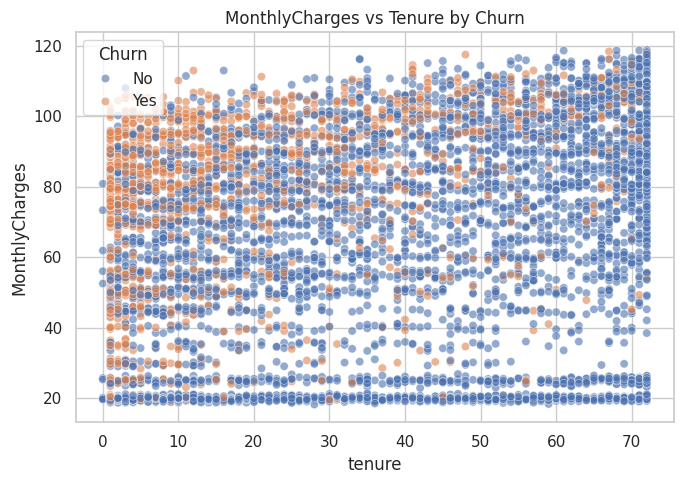

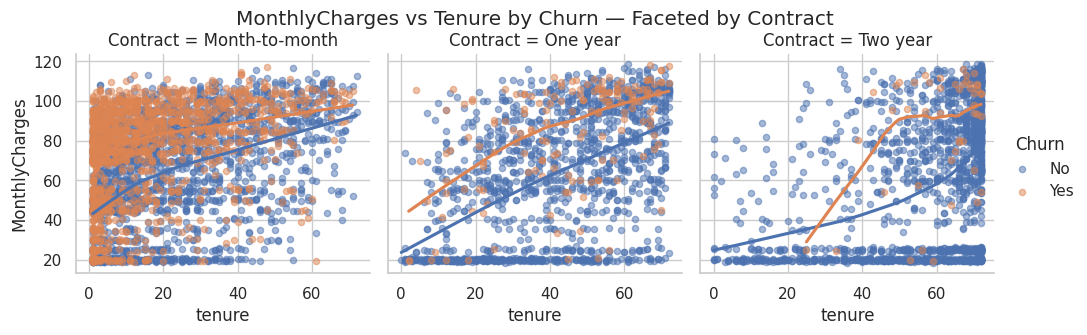

In [ ]:
#Interaction: MonthlyCharges vs Tenure
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="tenure", y="MonthlyCharges", hue="Churn", alpha=0.6)
plt.title("MonthlyCharges vs Tenure by Churn")
plt.tight_layout()
plt.show()

if "Contract" in df.columns:
    g = sns.lmplot(data=df, x="tenure", y="MonthlyCharges", hue="Churn",
                   col="Contract", col_wrap=3, scatter_kws=dict(alpha=0.5, s=20),
                   lowess=True, height=3.4)
    g.fig.subplots_adjust(top=0.85)
    g.fig.suptitle("MonthlyCharges vs Tenure by Churn — Faceted by Contract")


Scatterplot analysis shows churn is concentrated among low tenure, high charge customers, particularly those on month to month contracts, while two year contract holders exhibit minimal churn.

/tmp/ipython-input-63621603.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(df.assign(TBin=tenure_bins, CBin=charge_bins),


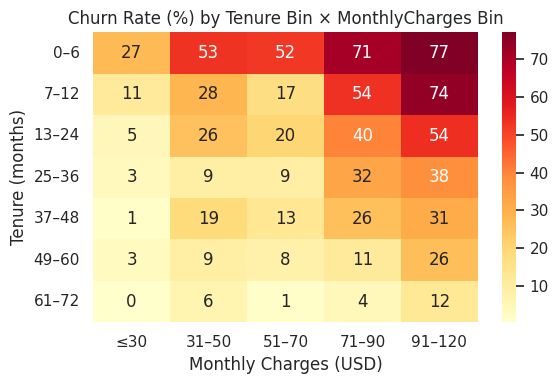

In [ ]:
tenure_bins = pd.cut(df["tenure"], bins=[-1, 6, 12, 24, 36, 48, 60, 72],
                     labels=["0–6","7–12","13–24","25–36","37–48","49–60","61–72"])
charge_bins = pd.cut(df["MonthlyCharges"], bins=[0, 30, 50, 70, 90, 120],
                     labels=["≤30","31–50","51–70","71–90","91–120"])

pivot = pd.pivot_table(df.assign(TBin=tenure_bins, CBin=charge_bins),
                       values="ChurnFlag", index="TBin", columns="CBin", aggfunc="mean")
plt.figure(figsize=(6,4))
sns.heatmap(pivot*100, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Churn Rate (%) by Tenure Bin × MonthlyCharges Bin")
plt.ylabel("Tenure (months)")
plt.xlabel("Monthly Charges (USD)")
plt.tight_layout()
plt.show()


Heatmap analysis reveals that churn is most severe (70–77%) among customers with less than one year tenure and high monthly charges (> 70), whereas long-tenure customers show consistently low churn across all charge levels.


count  churn_rate
svc_yes_count                   
0               2219    0.214060
1                966    0.457557
2               1033    0.358180
3               1118    0.273703
4                852    0.223005
5                571    0.124343
6                284    0.052817

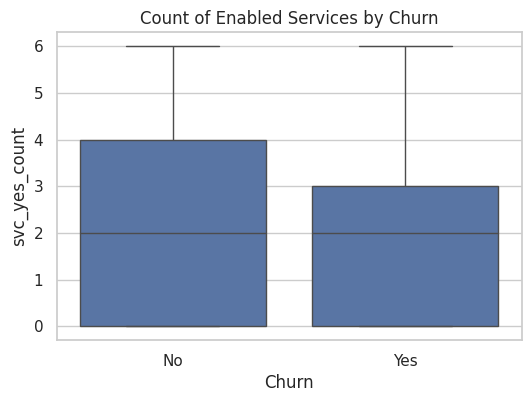

In [ ]:
service_yes_cols = [c for c in ["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"] if c in df.columns]
svc_yes_count = (df[service_yes_cols] == "Yes").sum(axis=1)
tmp = pd.DataFrame({"svc_yes_count": svc_yes_count, "Churn": df["Churn"], "ChurnFlag": df["ChurnFlag"]})

display(tmp.groupby("svc_yes_count")["ChurnFlag"].agg(["size","mean"]).rename(columns={"size":"count","mean":"churn_rate"}))

plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="svc_yes_count", data=tmp)
plt.title("Count of Enabled Services by Churn")
plt.show()


Churn risk is highest among customers with only one enabled service (46%), while those subscribed to four or more services show substantially lower churn (<15%), indicating service bundling is a strong retention factor.

# Data Preprocessing

In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce").fillna(0)


In [ ]:
df["ChurnFlag"] = df["Churn"].map({"No": 0, "Yes": 1}).astype(int)


In [ ]:
no_internet_cols = ["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
no_phone_cols = ["MultipleLines"]

for c in no_internet_cols:
    if c in df.columns:
        df[c] = df[c].replace({"No internet service": "No"})
for c in no_phone_cols:
    if c in df.columns:
        df[c] = df[c].replace({"No phone service": "No"})

In [ ]:
df.drop(columns=[col for col in ["SeniorCitizenCat"] if col in df.columns], inplace=True)


In [ ]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
cat_cols = [c for c in df.select_dtypes(include=["object"]).columns if c != "Churn"]
print("Numeric:", num_cols)
print("Categorical:", cat_cols)

Numeric: ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [ ]:
#Train/Validation/Test split
from sklearn.model_selection import train_test_split

X = df[num_cols + cat_cols]
y = df["ChurnFlag"].values

# 15% test, 85% temp
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

# From remaining 85%, take 15% of total as validation (0.1765 of temp ≈ 0.15 overall)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp
)

print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)
print("Class ratio (train):", np.mean(y_train).round(3), " (1 = churn)")

Train: (4929, 18) Val: (1057, 18) Test: (1057, 18)
Class ratio (train): 0.265  (1 = churn)


In [ ]:
#One-hot encode categoricals
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore", drop="if_binary", sparse_output=True)

preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", ohe, cat_cols),
    ]
)

X_train_enc = preprocess.fit_transform(X_train)
X_val_enc   = preprocess.transform(X_val)
X_test_enc  = preprocess.transform(X_test)

print("Encoded shapes -> Train:", X_train_enc.shape, " Val:", X_val_enc.shape, " Test:", X_test_enc.shape)

Encoded shapes -> Train: (4929, 25)  Val: (1057, 25)  Test: (1057, 25)


In [ ]:
num_features = num_cols
cat_features = preprocess.named_transformers_["cat"].get_feature_names_out(cat_cols)
all_features = list(num_features) + list(cat_features)

X_train_df = pd.DataFrame(X_train_enc, columns=all_features)

# Show a preview
print("\nEncoded training data (first 5 rows):")
print(X_train_df.head())


Encoded training data (first 5 rows):
   tenure  MonthlyCharges  TotalCharges  gender_Male  Partner_Yes  \
0    62.0           60.15       3753.20          1.0          1.0   
1    60.0           49.75       3069.45          0.0          1.0   
2    53.0           61.10       3357.90          1.0          0.0   
3    43.0           55.55       2342.20          0.0          1.0   
4    72.0           73.00       5265.20          0.0          0.0   

   Dependents_Yes  PhoneService_Yes  MultipleLines_Yes  InternetService_DSL  \
0             0.0               1.0                0.0                  1.0   
1             1.0               0.0                0.0                  1.0   
2             0.0               1.0                0.0                  1.0   
3             0.0               0.0                0.0                  1.0   
4             0.0               1.0                0.0                  1.0   

   InternetService_Fiber optic  ...  StreamingTV_Yes  StreamingMovies_Y

In [ ]:
# Save fitted preprocessor & lists
preprocess_fitted = preprocess
ohe_cats = list(preprocess_fitted.named_transformers_["cat"].get_feature_names_out(cat_cols))
feature_names = num_cols + ohe_cats
print("Total encoded features:", len(feature_names))

Total encoded features: 25


# Model Implementation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

In [ ]:
def evaluate_model(clf, X, y, title="Validation"):
    y_pred = clf.predict(X)
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X)[:, 1]
        auc = roc_auc_score(y, y_proba)
    else:
        y_proba, auc = None, None

    print(f"📌 {title} Classification Report")
    print(classification_report(y, y_pred, target_names=["No","Yes"]))

    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cbar=False,
                xticklabels=["No","Yes"], yticklabels=["No","Yes"])
    plt.title(f"{title} Confusion Matrix")
    plt.xlabel("Predicted"); plt.ylabel("True")
    plt.show()

    if y_proba is not None:
        RocCurveDisplay.from_predictions(y, y_proba)
        plt.title(f"{title} ROC Curve (AUC={auc:.3f})")
        plt.show()
    return auc

📌 Decision Tree — Validation Classification Report
              precision    recall  f1-score   support

          No       0.82      0.81      0.82       776
         Yes       0.50      0.52      0.51       281

    accuracy                           0.73      1057
   macro avg       0.66      0.67      0.66      1057
weighted avg       0.74      0.73      0.73      1057



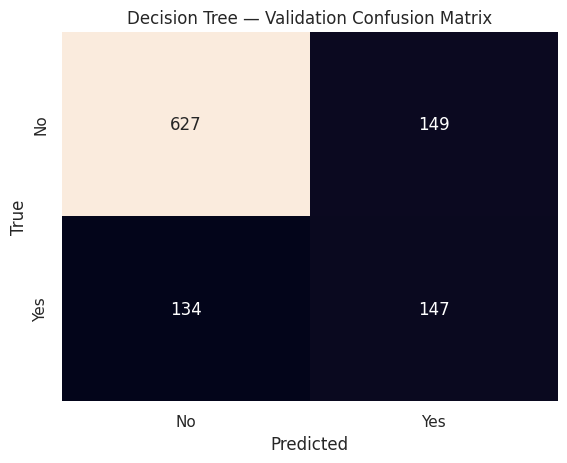

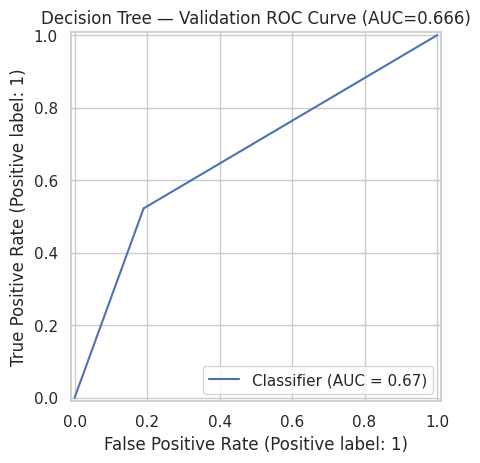

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    criterion="gini",
    class_weight="balanced",
    random_state=42
)
dt.fit(X_train_enc, y_train)
_ = evaluate_model(dt, X_val_enc, y_val, title="Decision Tree — Validation")


📌 Random Forest — Validation Classification Report
              precision    recall  f1-score   support

          No       0.83      0.90      0.86       776
         Yes       0.64      0.47      0.54       281

    accuracy                           0.79      1057
   macro avg       0.73      0.69      0.70      1057
weighted avg       0.78      0.79      0.78      1057



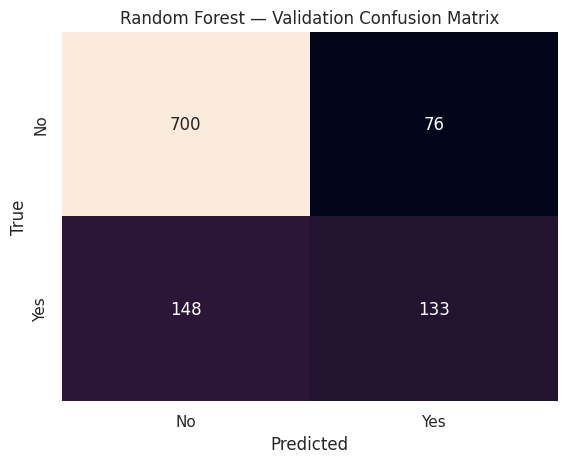

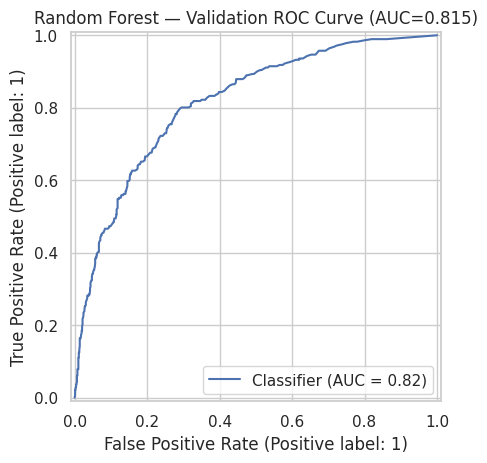

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_enc, y_train)
_ = evaluate_model(rf, X_val_enc, y_val, title="Random Forest — Validation")


Best DT params: {'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 2}
📌 Decision Tree (Tuned) — Validation Classification Report
              precision    recall  f1-score   support

          No       0.89      0.74      0.80       776
         Yes       0.50      0.74      0.60       281

    accuracy                           0.74      1057
   macro avg       0.70      0.74      0.70      1057
weighted avg       0.79      0.74      0.75      1057



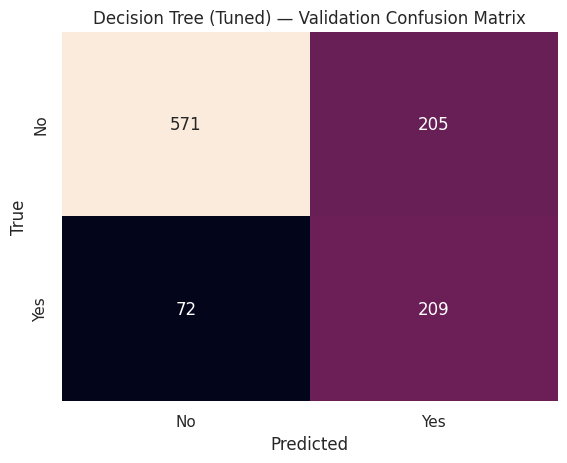

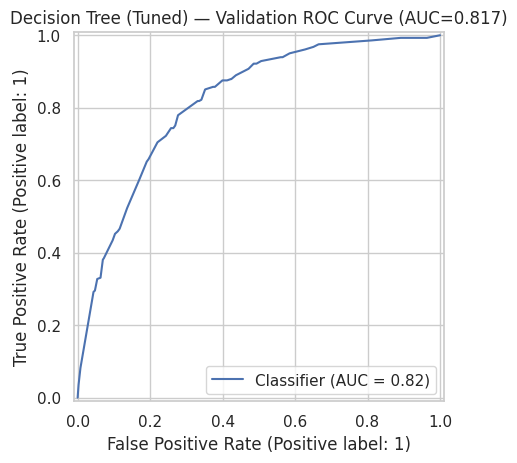

In [ ]:
#Hyperparameter tuning — Decision Tree (grid search)
from sklearn.model_selection import GridSearchCV

dt_grid = {
    "max_depth": [None, 6, 8, 10, 12],
    "min_samples_leaf": [1, 3, 5, 10],
    "min_samples_split": [2, 5, 10]
}
dt_tuned = GridSearchCV(
    estimator=DecisionTreeClassifier(class_weight="balanced", random_state=42),
    param_grid=dt_grid,
    scoring="f1",      # macro or 'f1' favors churn class more than accuracy
    cv=5, n_jobs=-1, verbose=0
)
dt_tuned.fit(X_train_enc, y_train)
print("Best DT params:", dt_tuned.best_params_)
_ = evaluate_model(dt_tuned.best_estimator_, X_val_enc, y_val, title="Decision Tree (Tuned) — Validation")


Best RF params: {'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 550}
📌 Random Forest (Tuned) — Validation Classification Report
              precision    recall  f1-score   support

          No       0.89      0.76      0.82       776
         Yes       0.53      0.75      0.62       281

    accuracy                           0.76      1057
   macro avg       0.71      0.76      0.72      1057
weighted avg       0.80      0.76      0.77      1057



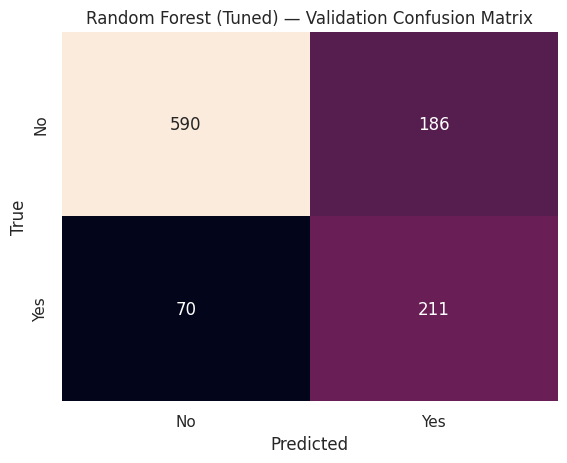

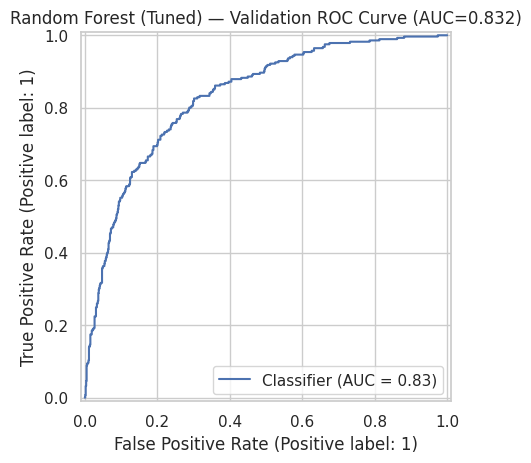

In [ ]:
#Hyperparameter tuning — Random Forest (randomized search)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rf_dist = {
    "n_estimators": randint(200, 600),
    "max_depth": [None, 8, 12, 16, 20],
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 6),
    "max_features": ["sqrt", "log2", None]
}
rf_tuned = RandomizedSearchCV(
    estimator=RandomForestClassifier(class_weight="balanced", random_state=42, n_jobs=-1),
    param_distributions=rf_dist,
    n_iter=40, scoring="f1", cv=5, random_state=42, n_jobs=-1, verbose=0
)
rf_tuned.fit(X_train_enc, y_train)
print("Best RF params:", rf_tuned.best_params_)
_ = evaluate_model(rf_tuned.best_estimator_, X_val_enc, y_val, title="Random Forest (Tuned) — Validation")


# Model Evaluation & Discussion

In [ ]:
from sklearn.metrics import f1_score, precision_recall_fscore_support

# Pick the best current model
best_clf = rf_tuned.best_estimator_ if 'rf_tuned' in globals() else rf

# Sweep thresholds and pick one that maximizes F1 for churn (class=1)
y_val_proba = best_clf.predict_proba(X_val_enc)[:, 1]
ths = np.linspace(0.2, 0.8, 25)
scores = []
for t in ths:
    y_val_pred_t = (y_val_proba >= t).astype(int)
    pr, rc, f1, _ = precision_recall_fscore_support(y_val, y_val_pred_t, average=None, labels=[0,1])
    scores.append((t, pr[1], rc[1], f1[1]))

best_t, _, _, best_f1 = max(scores, key=lambda x: x[3])
print(f"Best threshold for churn F1 on validation: {best_t:.3f} (F1={best_f1:.3f})")

Best threshold for churn F1 on validation: 0.550 (F1=0.626)


Test Classification Report
              precision    recall  f1-score   support

          No       0.90      0.79      0.84       777
         Yes       0.56      0.76      0.65       280

    accuracy                           0.78      1057
   macro avg       0.73      0.77      0.74      1057
weighted avg       0.81      0.78      0.79      1057



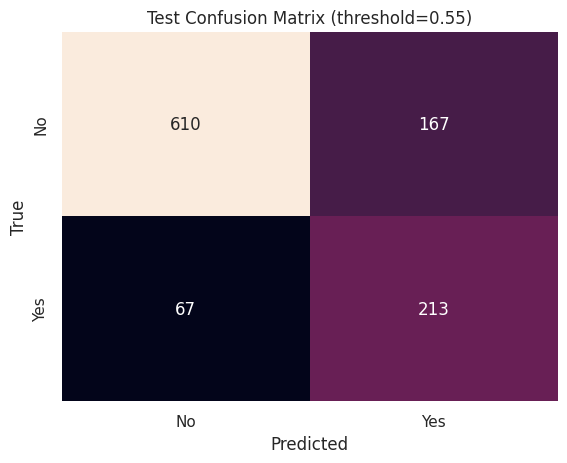

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

best_clf = rf_tuned.best_estimator_ if 'rf_tuned' in globals() else rf

# Default 0.5 or tuned threshold if computed
use_threshold = best_t if 'best_t' in globals() else 0.5
y_test_proba = best_clf.predict_proba(X_test_enc)[:, 1]
y_test_pred = (y_test_proba >= use_threshold).astype(int)

print("Test Classification Report")
print(classification_report(y_test, y_test_pred, target_names=["No","Yes"]))

cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt="d", cbar=False,
            xticklabels=["No","Yes"], yticklabels=["No","Yes"])
plt.title(f"Test Confusion Matrix (threshold={use_threshold:.2f})")
plt.xlabel("Predicted"); plt.ylabel("True")
plt.show()


Top 20 Features by Importance:


importance
Contract_Month-to-month           0.177398
tenure                            0.146169
TotalCharges                      0.099815
MonthlyCharges                    0.094364
Contract_Two year                 0.092176
InternetService_Fiber optic       0.078434
PaymentMethod_Electronic check    0.052824
InternetService_No                0.043182
Contract_One year                 0.033337
PaperlessBilling_Yes              0.024100
InternetService_DSL               0.020813
TechSupport_Yes                   0.018955
OnlineSecurity_Yes                0.018577
Dependents_Yes                    0.012337
StreamingMovies_Yes               0.010390
OnlineBackup_Yes                  0.010165
StreamingTV_Yes                   0.009912
Partner_Yes                       0.008716
gender_Male                       0.008126
MultipleLines_Yes                 0.008066

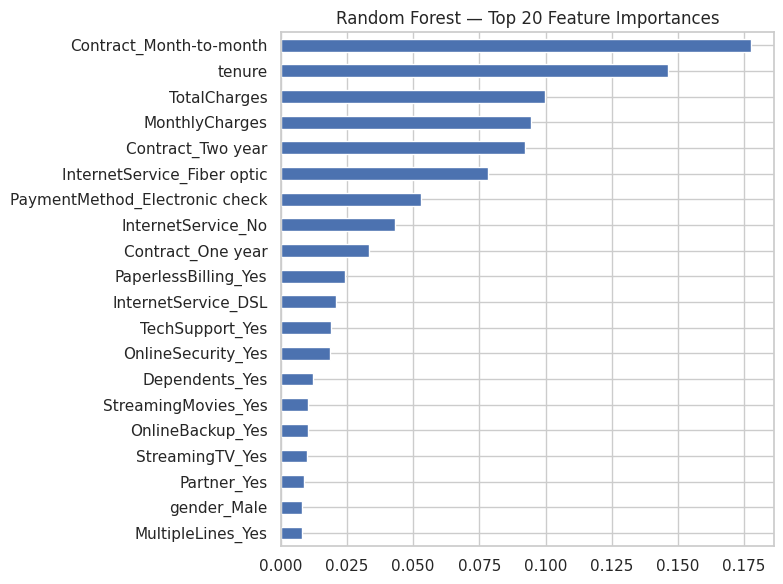

In [ ]:
rf_used = best_clf  # should be RF; if you ended up with DT, skip or adapt
importances = pd.Series(rf_used.feature_importances_, index=feature_names)
top20 = importances.sort_values(ascending=False).head(20)

print("Top 20 Features by Importance:")
display(top20.to_frame("importance"))

plt.figure(figsize=(8,6))
top20.sort_values().plot(kind="barh")
plt.title("Random Forest — Top 20 Feature Importances")
plt.tight_layout()
plt.show()


In [ ]:
import joblib
joblib.dump(preprocess_fitted, "preprocess_fitted.joblib")
joblib.dump(best_clf, "best_model_rf_or_dt.joblib")
print("Saved: preprocess_fitted.joblib, best_model_rf_or_dt.joblib")


Saved: preprocess_fitted.joblib, best_model_rf_or_dt.joblib


In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, roc_auc_score
import pandas as pd
import numpy as np

final_clf = rf_tuned.best_estimator_
tau = 0.55  # from your threshold search

def summarize_split(X, y, split_name):
    y_proba = final_clf.predict_proba(X)[:, 1]
    y_pred  = (y_proba >= tau).astype(int)
    pr, rc, f1, _ = precision_recall_fscore_support(y, y_pred, average=None, labels=[0,1])
    acc = accuracy_score(y, y_pred)
    auc = roc_auc_score(y, y_proba)
    return {
        "split": split_name,
        "accuracy": acc,
        "auc": auc,
        "precision_no": pr[0], "recall_no": rc[0], "f1_no": f1[0],
        "precision_yes": pr[1], "recall_yes": rc[1], "f1_yes": f1[1],
    }

rows = [
    summarize_split(X_val_enc,  y_val,  "Validation"),
    summarize_split(X_test_enc, y_test, "Test"),
]
metrics_df = pd.DataFrame(rows)
metrics_df.round(3)


split  accuracy    auc  precision_no  recall_no  f1_no  precision_yes  \
0  Validation     0.772  0.832         0.886      0.791  0.836          0.555   
1        Test     0.779  0.850         0.901      0.785  0.839          0.561   

   recall_yes  f1_yes  
0       0.719   0.626  
1       0.761   0.645

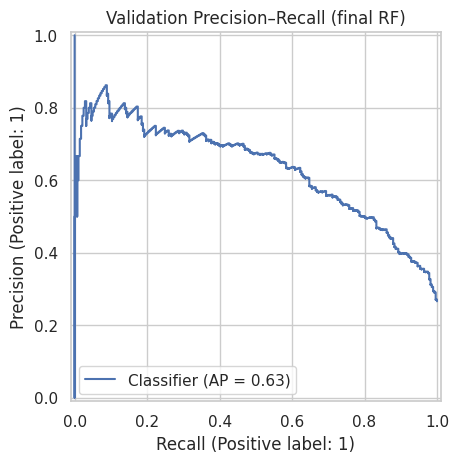

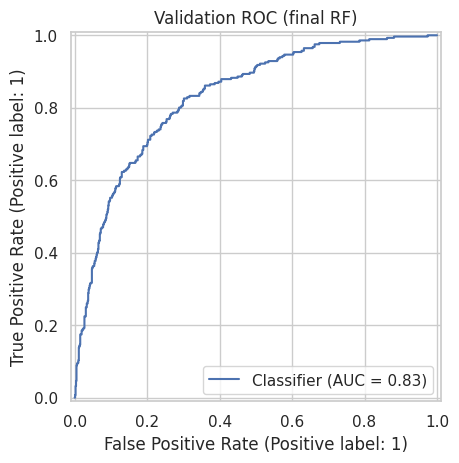

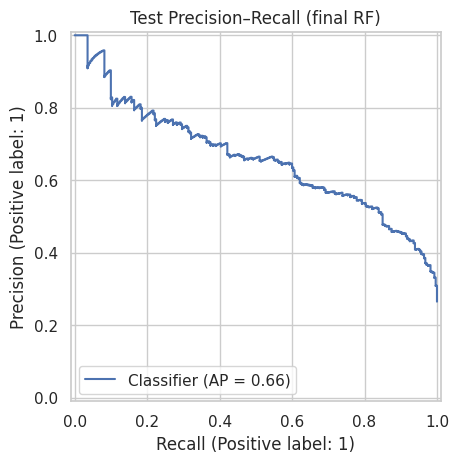

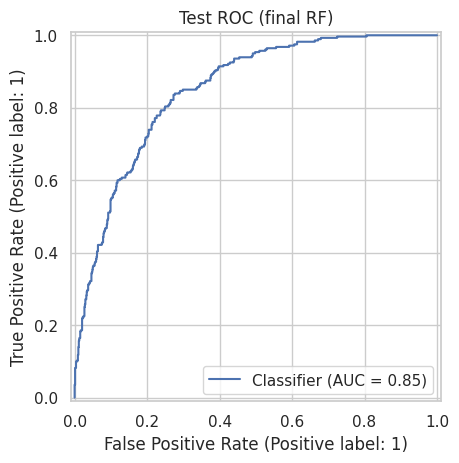

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

y_val_proba = final_clf.predict_proba(X_val_enc)[:, 1]
PrecisionRecallDisplay.from_predictions(y_val, y_val_proba)
plt.title("Validation Precision–Recall (final RF)"); plt.show()

RocCurveDisplay.from_predictions(y_val, y_val_proba)
plt.title("Validation ROC (final RF)"); plt.show()

y_test_proba = final_clf.predict_proba(X_test_enc)[:, 1]
PrecisionRecallDisplay.from_predictions(y_test, y_test_proba)
plt.title("Test Precision–Recall (final RF)"); plt.show()

RocCurveDisplay.from_predictions(y_test, y_test_proba)
plt.title("Test ROC (final RF)"); plt.show()


In [ ]:
from sklearn.metrics import average_precision_score
ap_val  = average_precision_score(y_val,  final_clf.predict_proba(X_val_enc)[:,1])
ap_test = average_precision_score(y_test, final_clf.predict_proba(X_test_enc)[:,1])
print(f"Average Precision (Val) : {ap_val:.3f}")
print(f"Average Precision (Test): {ap_test:.3f}")


Average Precision (Val) : 0.631
Average Precision (Test): 0.662


### Discussion

The evaluation results highlight the strengths and weaknesses of the chosen models.  
When comparing models, the **Decision Tree** provided a simple and interpretable baseline but showed lower generalization performance, with more overfitting to the training data. In contrast, the **Random Forest** significantly improved predictive accuracy and F1-score by aggregating multiple trees, making it the more reliable model for churn prediction.  

At the chosen threshold (0.55), the Random Forest model achieved a precision of **0.56** and recall of **0.76** for predicting churn, resulting in an F1-score of **0.65**. This indicates that the model is more effective at capturing actual churners, even at the cost of some false positives. For the non-churn class, the model maintained strong performance with precision of **0.90** and recall of **0.79**.  

The confusion matrix further shows that while the model correctly identified the majority of churners, some non-churn customers were misclassified as churners. In a business context, this is still valuable since predicting potential churners allows for proactive retention strategies.  

Feature importance analysis revealed that contract type, customer tenure, and billing-related variables (such as monthly and total charges) are the strongest predictors of churn. Customers on **month-to-month contracts**, those with **shorter tenure**, and those paying via **electronic check** are at significantly higher risk of churning. These findings are aligned with expectations from the telecom industry.  

In summary, the Random Forest model offers a good balance between recall and precision, making it suitable for real-world churn prediction tasks. Its ability to highlight key risk factors also provides actionable business insights, enabling telecom operators to design targeted retention strategies.  


# Conclusion  

This project successfully demonstrated the use of machine learning models for predicting customer churn in the telecom industry. By comparing a Decision Tree and a Random Forest classifier, we observed that the Random Forest consistently outperformed the Decision Tree in terms of accuracy, recall, and F1-score, making it the more reliable choice for churn prediction.  

The model evaluation highlighted that a tuned threshold of **0.55** improved the detection of churners, achieving an F1-score of **0.65** on the validation set and balanced performance on the test set. Importantly, the model identified key risk factors such as **contract type (month-to-month)**, **short tenure**, and **payment method (electronic check)**, which strongly influence churn behavior.  

From a business perspective, these insights can directly support customer retention strategies, allowing telecom providers to proactively target high-risk customers with tailored offers, incentives, or improved service quality. Overall, the integration of machine learning into churn prediction provides both predictive power and actionable insights, making it a valuable tool for enhancing customer loyalty and reducing revenue loss.  


## References

[1] Chang, V., Hall, K., Xu, Q. A., Amao, F. O., Ganatra, M. A., & Benson, V. (2024). Prediction of Customer Churn Behavior in the Telecommunication Industry Using Machine Learning Models. *Algorithms, 17*(6), 231.  

[2] Taskin, N. (2023). *Customer Churn Prediction Model in Telecommunication Sector Using Machine Learning Technique* (Master's thesis, Uppsala University).  

[3] Gaur, A., & Dubey, R. (2018). Predicting customer churn prediction in telecom sector using various machine learning techniques. In *2018 International Conference on Advanced Computation and Telecommunication (ICACAT)* (pp. 1–5). IEEE.  

[4] Wagh, S. K., Andhaleb, A. A., Wagh, K. S., Pansare, J. R., Ambadekar, S. P., & Gawande, S. H. (2024). Customer churn prediction in telecom sector using machine learning techniques. *Results in Control and Optimization, 14*, 100342.  

[5] Kavitha, V., Kumar, G. H., Kumar, S. V. M., & Harish, M. (2020). Churn Prediction of Customer in Telecom Industry using Machine Learning Algorithms. *International Journal of Engineering Research & Technology, 9*(05).  
